In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from skimage.segmentation import slic, mark_boundaries
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.base import BaseEstimator, RegressorMixin
from tensorflow.keras.losses import CategoricalCrossentropy


In [ ]:
!pip install lime

In [ ]:
from lime import lime_image

In [ ]:
# Load datasets
with open('train.p', 'rb') as f:
    train_data = pickle.load(f)
with open('valid.p', 'rb') as f:
    valid_data = pickle.load(f)
with open('test.p', 'rb') as f:
    test_data = pickle.load(f)

X_train, y_train = train_data['features'], train_data['labels']
X_valid, y_valid = valid_data['features'], valid_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

# Normalize data
X_train = X_train.astype('float32') / 255
X_valid = X_valid.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode labels
n_classes = len(set(y_train))
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)
y_test = to_categorical(y_test, n_classes)


In [ ]:
def custom_categorical_crossentropy(*args, **kwargs):
    kwargs.pop('fn', None)  # Remove 'fn' if it's there
    return CategoricalCrossentropy(*args, **kwargs)
    # Load pre-trained model

model = load_model("CNN_adv_training_paper_superpixel_estop20_2501_02.h5",
                  custom_objects={'CategoricalCrossentropy': custom_categorical_crossentropy})


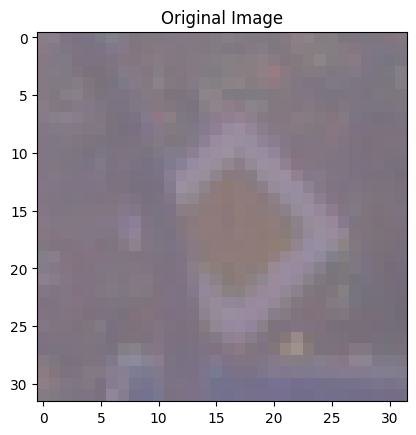

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
Top 5 predictions for the original image:
1: Class 12, Probability: 1.0000
2: Class 41, Probability: 0.0000
3: Class 13, Probability: 0.0000
4: Class 35, Probability: 0.0000
5: Class 10, Probability: 0.0000


In [ ]:
# Select test image and label
test_image = X_test[4002]
test_label = y_test[4002]

# Correct test_label_one_hot shape
test_label_one_hot = tf.keras.utils.to_categorical(np.argmax(test_label), num_classes=model.output_shape[-1])
test_label_one_hot = np.expand_dims(test_label_one_hot, axis=0)  # Add batch dimension

# Visualize the original test image
plt.imshow(test_image)
plt.title("Original Image")
plt.show()

# Make predictions on the original image
updated_image = np.expand_dims(test_image, axis=0)
prediction = model.predict(updated_image)[0]

# Print top-5 predictions for the original image
top_5_indices = prediction.argsort()[-5:][::-1]
print("Top 5 predictions for the original image:")
for i, idx in enumerate(top_5_indices):
    print(f"{i+1}: Class {idx}, Probability: {prediction[idx]:.4f}")


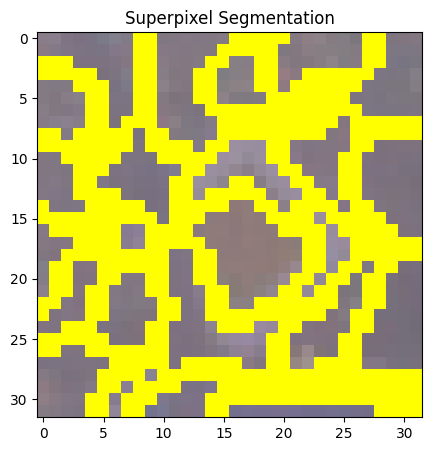

Number of superpixels: 25


In [ ]:
# Generate superpixels using SLIC
segments = slic(test_image, n_segments=50, compactness=5, sigma=1)
num_superpixels = np.unique(segments).shape[0]

# Visualize superpixel segmentation on the original image
plt.figure(figsize=(5, 5))
plt.imshow(mark_boundaries(test_image, segments))
plt.title("Superpixel Segmentation")
plt.show()
print(f"Number of superpixels: {num_superpixels}")

In [ ]:
def fixed_segmentation_fn(_):
  return segments

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━

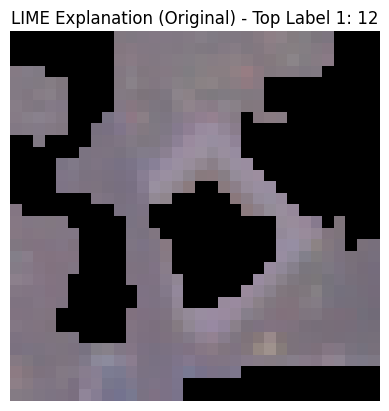

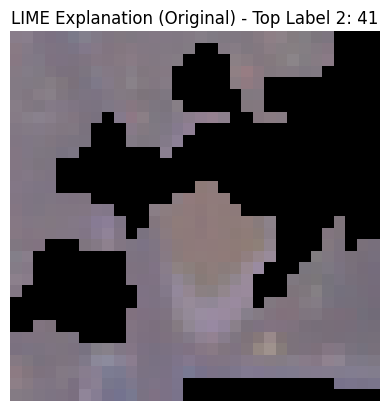

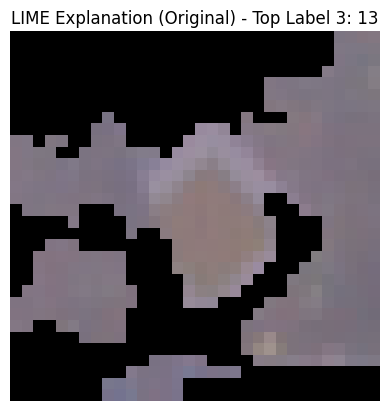

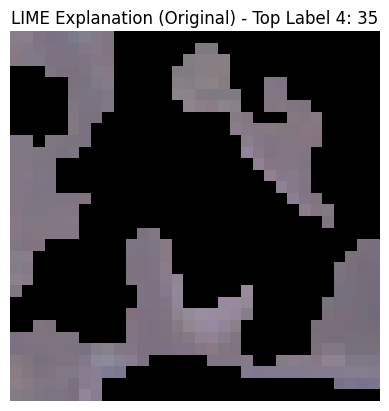

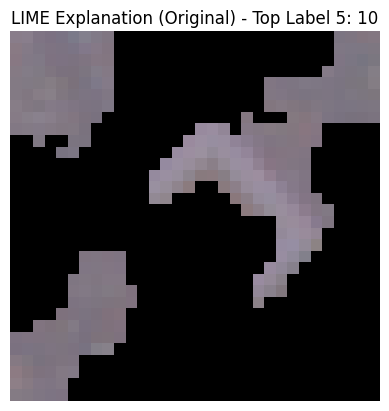

In [ ]:
# LIME interpretation on the original image
def classifier_fn(images):
    images = np.array([image for image in images])
    return model.predict(images)

explainer = lime_image.LimeImageExplainer()

explanation = explainer.explain_instance(
    test_image,
    classifier_fn=classifier_fn,
    top_labels=5,
    hide_color=0,
    num_samples=1000,
    segmentation_fn=fixed_segmentation_fn
)

# Visualize LIME explanation for the original image
for i in range(5):
    temp, mask = explanation.get_image_and_mask(explanation.top_labels[i], positive_only=True, num_features=20, hide_rest=True)
    plt.figure()
    plt.title(f'LIME Explanation (Original) - Top Label {i+1}: {explanation.top_labels[i]}')
    plt.imshow(temp)  
    plt.axis('off')
    plt.show()

In [ ]:
#ADVESARIAL IMAGES

loss tf.Tensor(0.0, shape=(), dtype=float32)
Processing 25 superpixels...


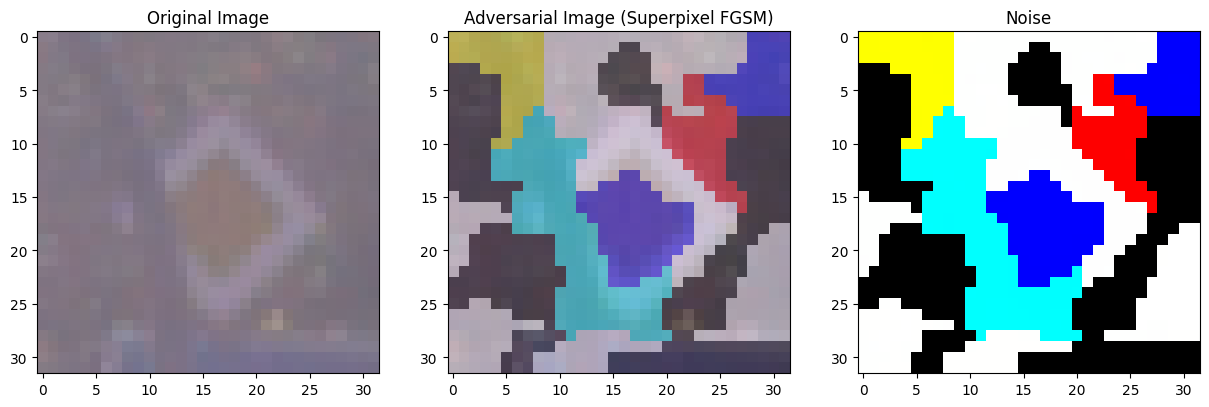

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━

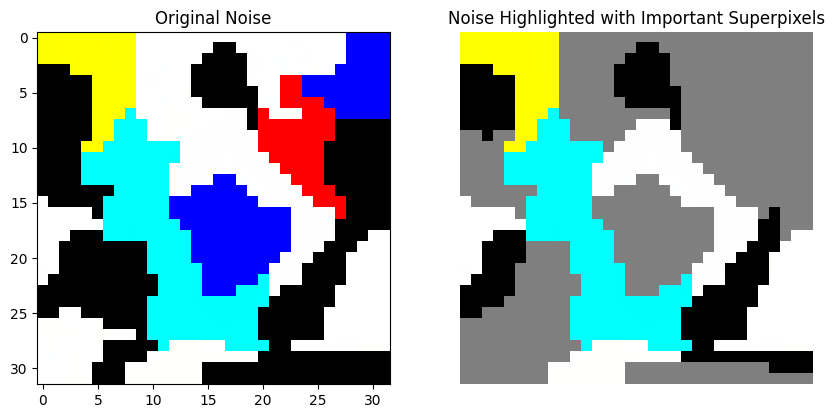

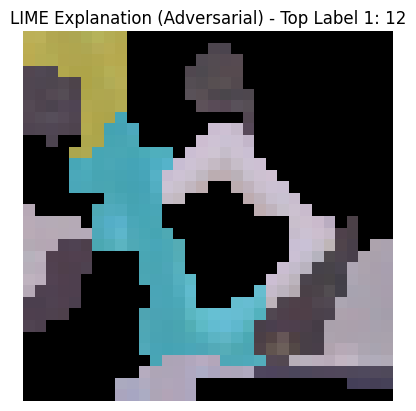

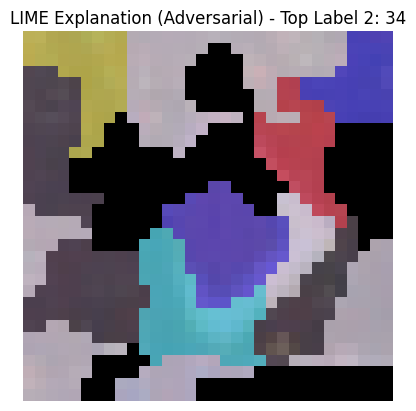

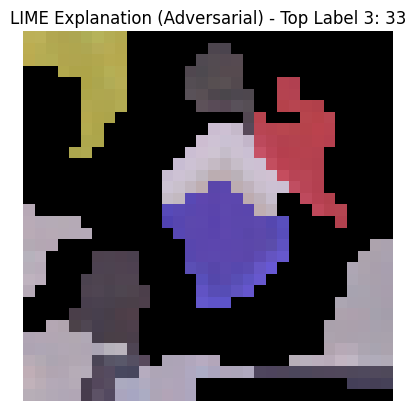

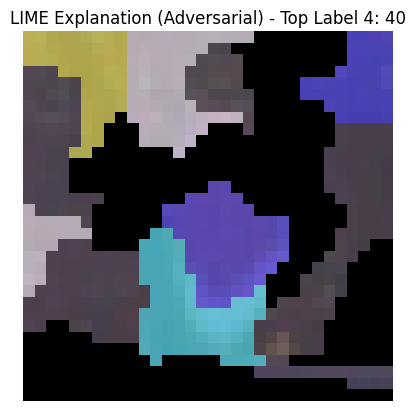

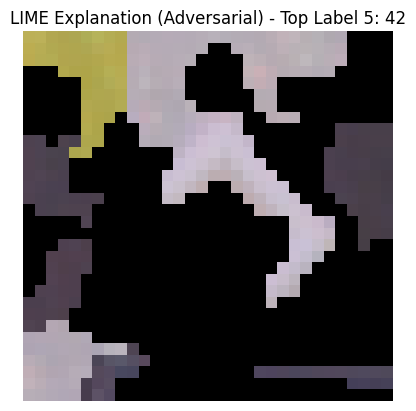

In [ ]:
# FGSM attack on superpixels
def generate_fgsm_superpixel(model, image, label, epsilon, segments):
    """
    Generate adversarial example using FGSM applied to superpixels with averaged gradients.
    """
    # Ensure label matches model's output shape
    image = tf.convert_to_tensor(image[np.newaxis, ...], dtype=tf.float32)  # Add batch dimension
    label = tf.convert_to_tensor(label, dtype=tf.float32)

    # Compute gradient of loss with respect to the input image
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image) 
        loss = tf.keras.losses.categorical_crossentropy(label, prediction)  # Compute loss
        print('loss', sum(loss))
    gradient = tape.gradient(loss, image).numpy()[0]
    adversarial_image = image.numpy()[0]

    # Perturb each superpixel based on the sum gradient
    unique_superpixels = np.unique(segments)
    print(f"Processing {len(unique_superpixels)} superpixels...")
    for superpixel_id in unique_superpixels:
        mask = (segments == superpixel_id)
        avg_gradient = np.sum(gradient[mask], axis=0)  # Sum gradient for the superpixel
        adversarial_image[mask] += epsilon * np.sign(avg_gradient)  # Apply perturbation uniformly in the superpixel

    # Clip the adversarial image to valid range
    adversarial_image = np.clip(adversarial_image, 0, 1)
    return adversarial_image

# Generate adversarial image
epsilon = 0.2
adversarial_image = generate_fgsm_superpixel(model, test_image, test_label_one_hot, epsilon, segments)

# Calculate the noise
noise = adversarial_image - test_image
#print('noise', noise)
noise_scaled = (noise - np.min(noise)) / (np.max(noise) - np.min(noise))

# Visualize original, adversarial image, and noise
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(test_image)

plt.subplot(1, 3, 2)
plt.title("Adversarial Image (Superpixel FGSM)")
plt.imshow(adversarial_image)

plt.subplot(1, 3, 3)
plt.title("Noise")
plt.imshow(noise_scaled)

plt.show()#Adversarial image

# LIME interpretation for the adversarial image
explanation_adv = explainer.explain_instance(
    adversarial_image,
    classifier_fn=classifier_fn,
    top_labels=5,
    hide_color=0,
    num_samples=1000,
    segmentation_fn=fixed_segmentation_fn
)

# Visualize LIME explanation on the noise image
temp, mask = explanation_adv.get_image_and_mask(explanation_adv.top_labels[0], positive_only=True, num_features=20, hide_rest=True)
# overlay LIME mask on the noise image
#noise_highlighted = noise_scaled * mask[..., np.newaxis]

noise_highlighted = noise_scaled.copy()
unhighlighted_mask = ~mask.astype(bool)  # create mask for unhighlighted areas
noise_highlighted[unhighlighted_mask] = 0.5  # keep unhighlighted regions in gray

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Noise')
plt.imshow(noise_scaled)

plt.subplot(1, 2,2)
plt.imshow(noise_highlighted)
plt.title('Noise Highlighted with Important Superpixels')
plt.axis('off')
plt.show()

# Visualize LIME explanation for the adversarial image
for i in range(5):
    temp, mask = explanation_adv.get_image_and_mask(explanation_adv.top_labels[i], positive_only=True, num_features=20, hide_rest=True)
    plt.figure()
    plt.title(f'LIME Explanation (Adversarial) - Top Label {i+1}: {explanation_adv.top_labels[i]}')
    plt.imshow(temp)
    plt.axis('off')
    plt.show()




In [ ]:
# Print top-5 predictions for the adversarial image
prediction_adv = model.predict(np.expand_dims(adversarial_image, axis=0))[0]
top_5_indices_adv = prediction_adv.argsort()[-5:][::-1]
print("Top 5 predictions for the adversarial image:")
for i, idx in enumerate(top_5_indices_adv):
    print(f"{i+1}: Class {idx}, Probability: {prediction_adv[idx]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Top 5 predictions for the adversarial image:
1: Class 12, Probability: 0.9842
2: Class 34, Probability: 0.0066
3: Class 33, Probability: 0.0041
4: Class 40, Probability: 0.0039
5: Class 42, Probability: 0.0007


Processing 25 superpixels...


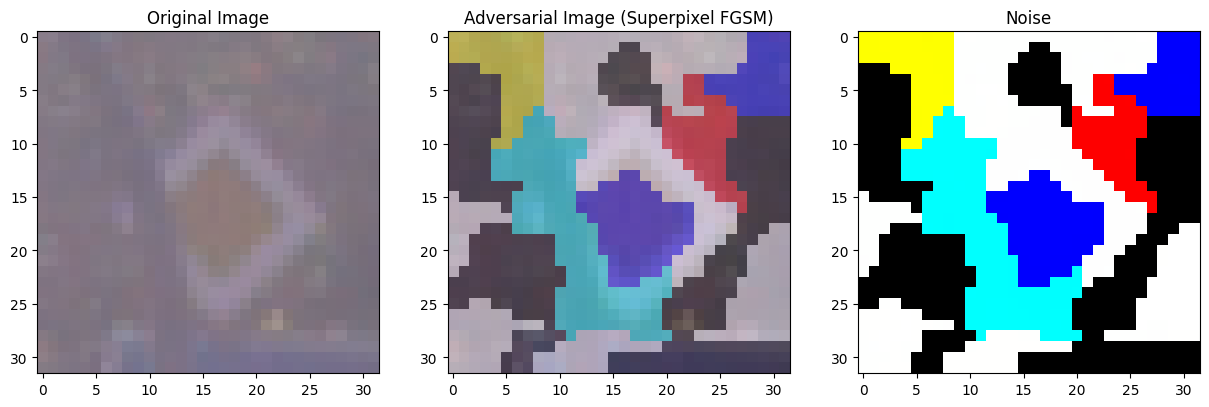

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

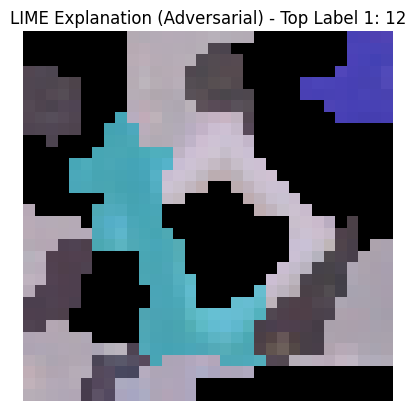

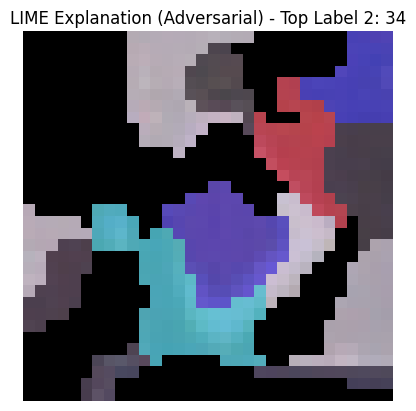

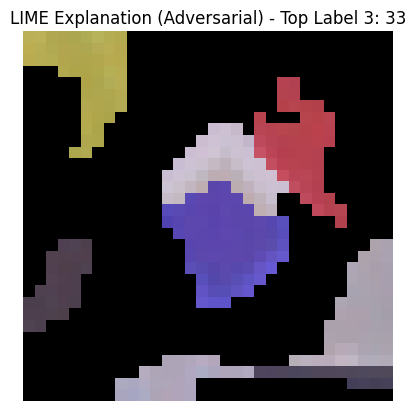

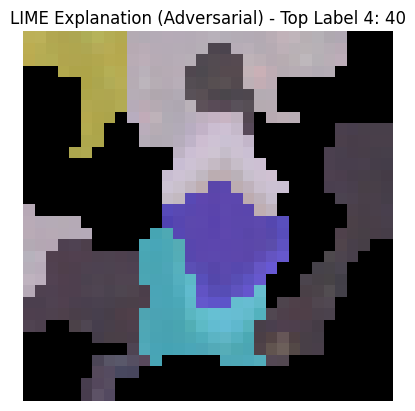

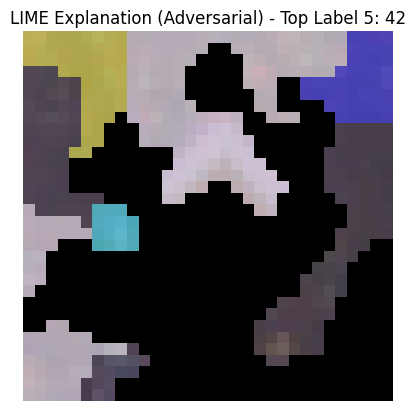

In [ ]:
#custom regression model in LIME with alpha = 10
# FGSM attack on superpixels
def generate_fgsm_superpixel(model, image, label, epsilon, segments):
    """
    Generate adversarial example using FGSM applied to superpixels with averaged gradients.
    """
    # Ensure label matches model's output shape
    image = tf.convert_to_tensor(image[np.newaxis, ...], dtype=tf.float32)  # Add batch dimension
    label = tf.convert_to_tensor(label, dtype=tf.float32)  # Ensure label is a tensor

    # Compute gradient of loss with respect to the input image
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)  # Model prediction
        #print(label)
        loss = tf.keras.losses.categorical_crossentropy(label, prediction)  # Compute loss
        #rint('loss', loss)
    gradient = tape.gradient(loss, image).numpy()[0]
    adversarial_image = image.numpy()[0]

    # Perturb each superpixel based on the average gradient
    unique_superpixels = np.unique(segments)
    print(f"Processing {len(unique_superpixels)} superpixels...")
    for superpixel_id in unique_superpixels:
        mask = (segments == superpixel_id)
        avg_gradient = np.sum(gradient[mask], axis=0)  # sum gradient for the superpixel
        adversarial_image[mask] += epsilon * np.sign(avg_gradient)  # Apply perturbation uniformly in the superpixel

    # Clip the adversarial image to valid range
    adversarial_image = np.clip(adversarial_image, 0, 1)
    return adversarial_image

# Generate adversarial image
epsilon = 0.2
adversarial_image = generate_fgsm_superpixel(model, test_image, test_label_one_hot, epsilon, segments)

# Calculate the noise
noise = adversarial_image - test_image
#print('noise', noise)
noise_scaled = (noise - np.min(noise)) / (np.max(noise) - np.min(noise))

# Visualize original, adversarial image, and noise
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(test_image)

plt.subplot(1, 3, 2)
plt.title("Adversarial Image (Superpixel FGSM)")
plt.imshow(adversarial_image)

plt.subplot(1, 3, 3)
plt.title("Noise")
plt.imshow(noise_scaled)

plt.show()#Adversarial image

# LIME interpretation for the adversarial image
explanation_adv = explainer.explain_instance(
    adversarial_image,
    classifier_fn=classifier_fn,
    top_labels=5,
    hide_color=0,
    num_samples=1000,
    segmentation_fn=fixed_segmentation_fn,
    model_regressor=Ridge(alpha=10)
)

# Visualize LIME explanation for the adversarial image
for i in range(5):
    temp, mask = explanation_adv.get_image_and_mask(explanation_adv.top_labels[i], positive_only=True, num_features=20, hide_rest=True)
    plt.figure()
    plt.title(f'LIME Explanation (Adversarial) - Top Label {i+1}: {explanation_adv.top_labels[i]}')
    plt.imshow(temp) 
    plt.axis('off')
    plt.show()




In [ ]:
# Print top-5 predictions for the adversarial image
prediction_adv = model.predict(np.expand_dims(adversarial_image, axis=0))[0]
top_5_indices_adv = prediction_adv.argsort()[-5:][::-1]
print("Top 5 predictions for the adversarial image:")
for i, idx in enumerate(top_5_indices_adv):
    print(f"{i+1}: Class {idx}, Probability: {prediction_adv[idx]:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Top 5 predictions for the adversarial image:
1: Class 12, Probability: 0.9842
2: Class 34, Probability: 0.0066
3: Class 33, Probability: 0.0041
4: Class 40, Probability: 0.0039
5: Class 42, Probability: 0.0007
